In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset_day = pd.read_csv("data/day.csv")
dataset_hour = pd.read_csv("data/hour.csv")

In [3]:
dataset_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
dataset_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
dataset_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
dataset_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

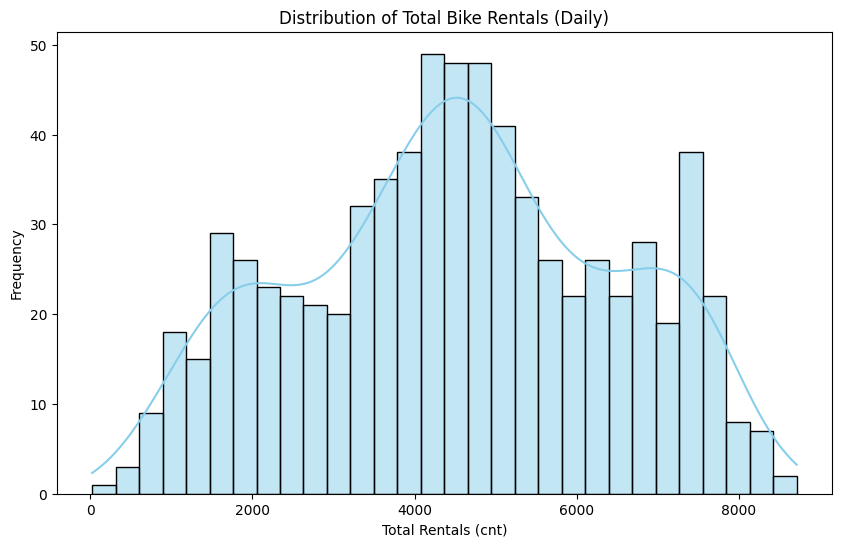

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset_day['cnt'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Total Bike Rentals (Daily)')
plt.xlabel('Total Rentals (cnt)')
plt.ylabel('Frequency')
plt.show()

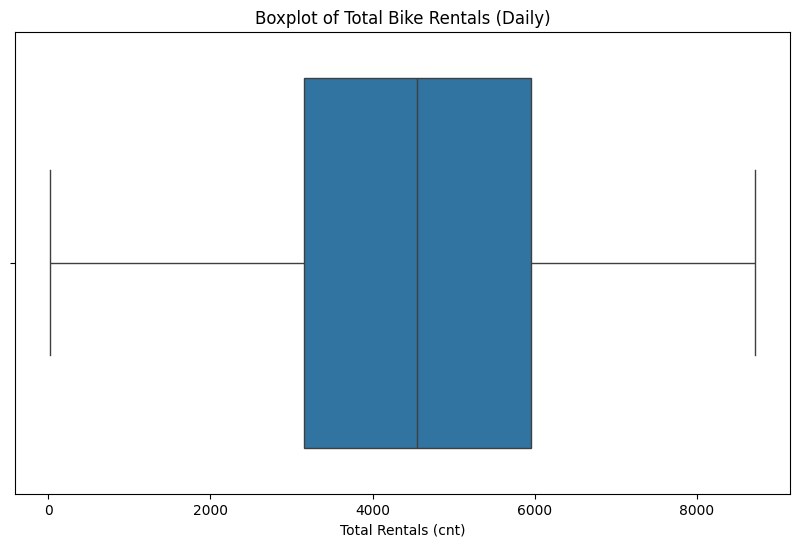

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cnt', data=dataset_day)
plt.title('Boxplot of Total Bike Rentals (Daily)')
plt.xlabel('Total Rentals (cnt)')
plt.show()

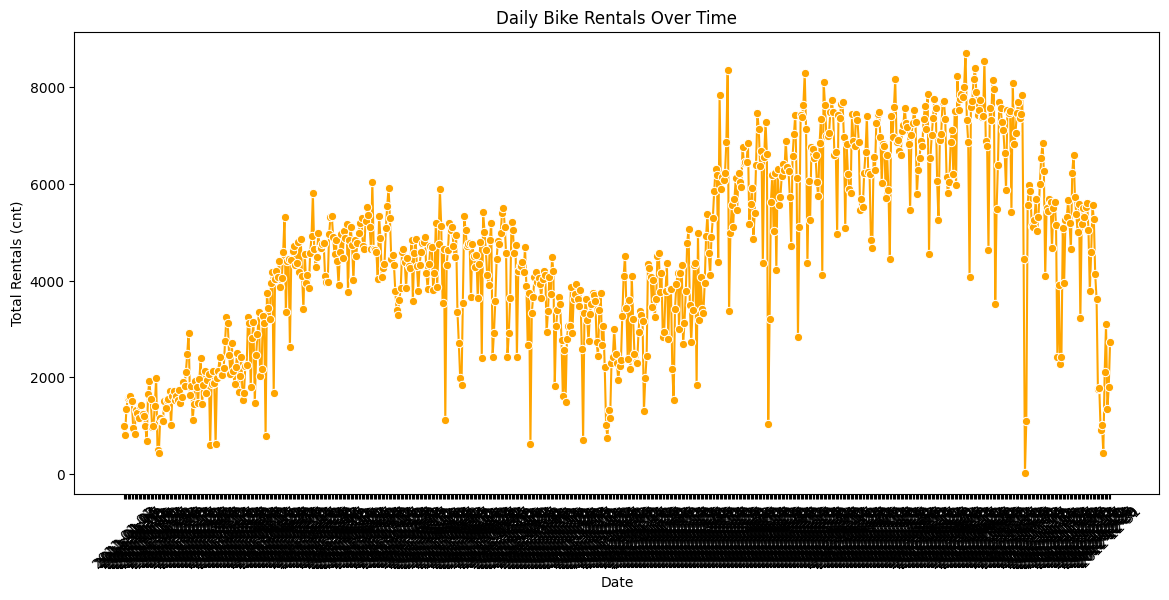

In [9]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='dteday', y='cnt', data=dataset_day, marker='o', color='orange')
plt.title('Daily Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rentals (cnt)')
plt.xticks(rotation=45)
plt.show()

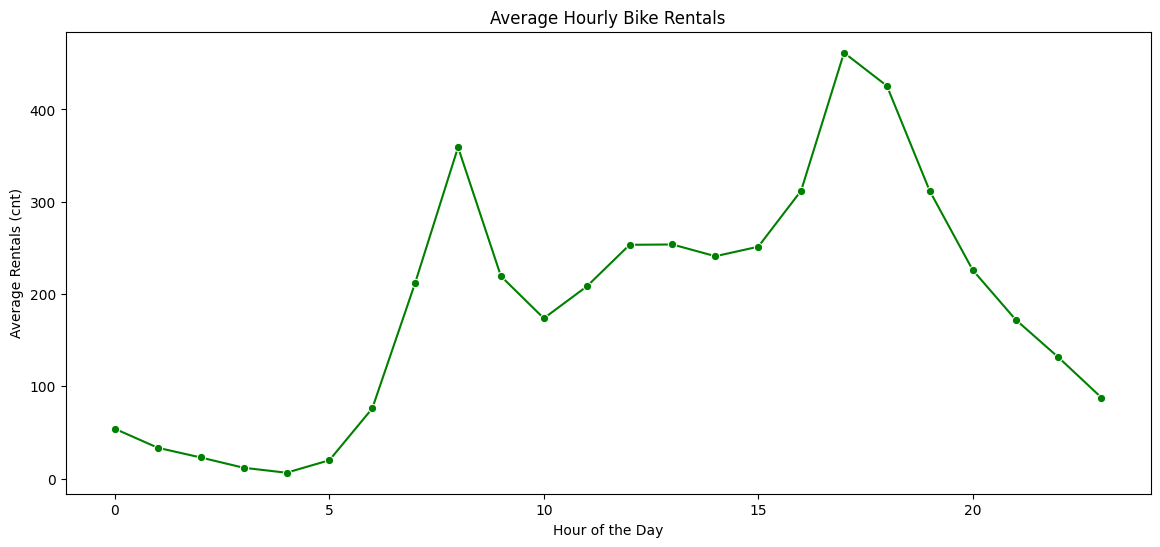

In [10]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='hr', y='cnt', data=dataset_hour.groupby('hr')['cnt'].mean().reset_index(), marker='o', color='green')
plt.title('Average Hourly Bike Rentals')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals (cnt)')
plt.show()

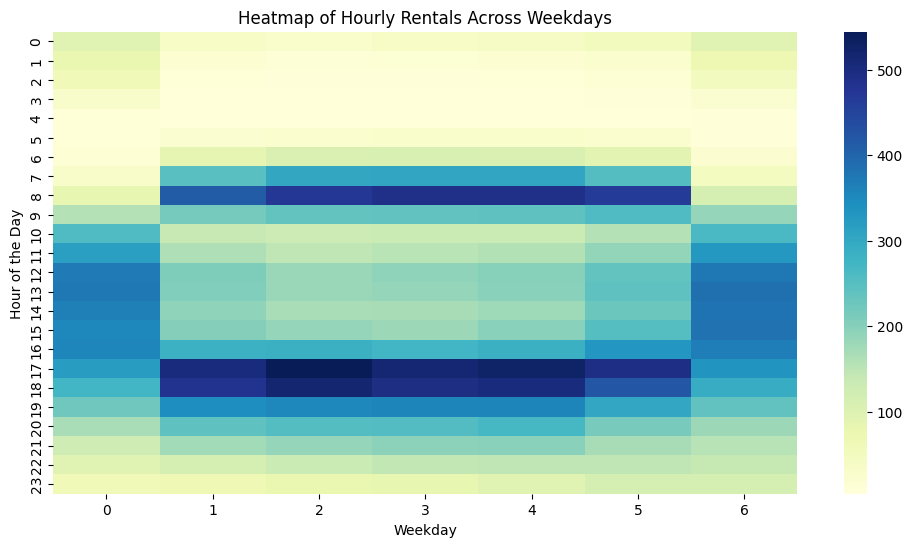

In [11]:
hourly_grouped = dataset_hour.groupby(['hr', 'weekday'])['cnt'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_grouped, cmap='YlGnBu')
plt.title('Heatmap of Hourly Rentals Across Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Hour of the Day')
plt.show()

C:\Users\nabhp\AppData\Local\Temp\ipykernel_33440\2193433345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=dataset_day, palette='Set2')


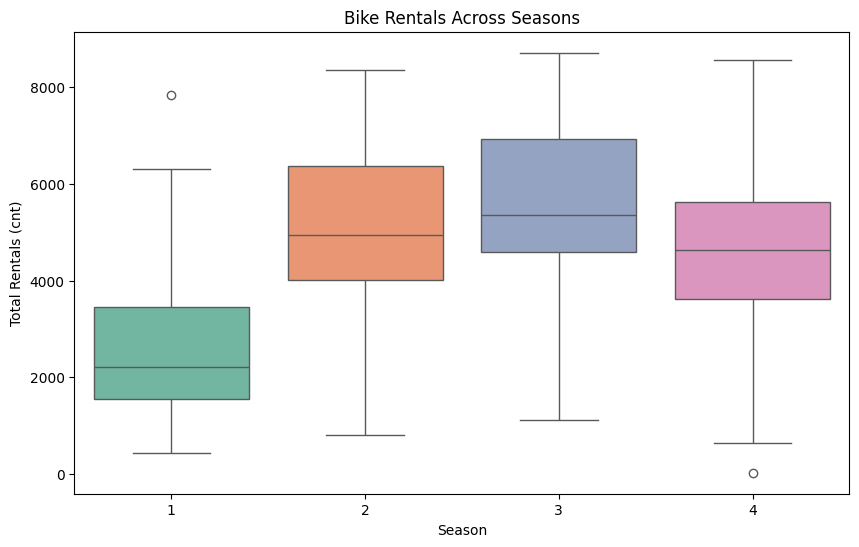

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=dataset_day, palette='Set2')
plt.title('Bike Rentals Across Seasons')
plt.xlabel('Season')
plt.ylabel('Total Rentals (cnt)')
plt.show()

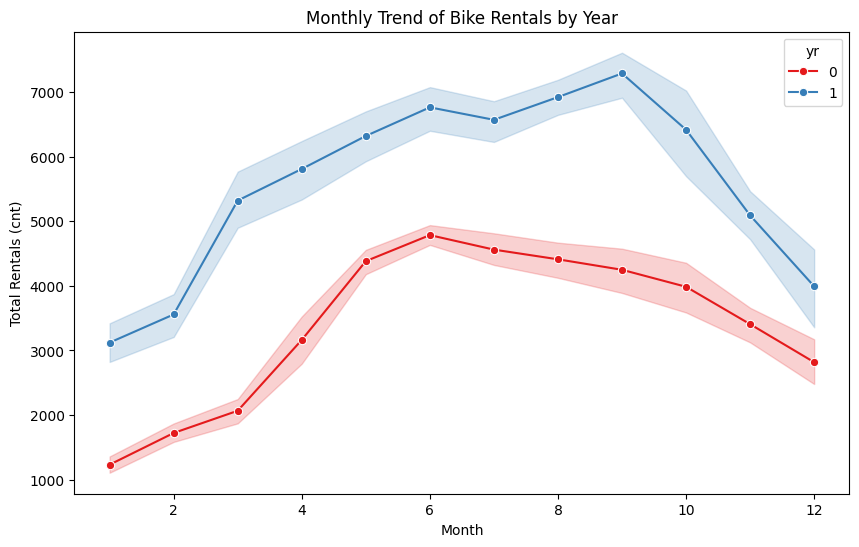

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='mnth', y='cnt', hue='yr', data=dataset_day, marker='o', palette='Set1')
plt.title('Monthly Trend of Bike Rentals by Year')
plt.xlabel('Month')
plt.ylabel('Total Rentals (cnt)')
plt.show()

C:\Users\nabhp\AppData\Local\Temp\ipykernel_33440\3786533001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=dataset_day, palette='muted')


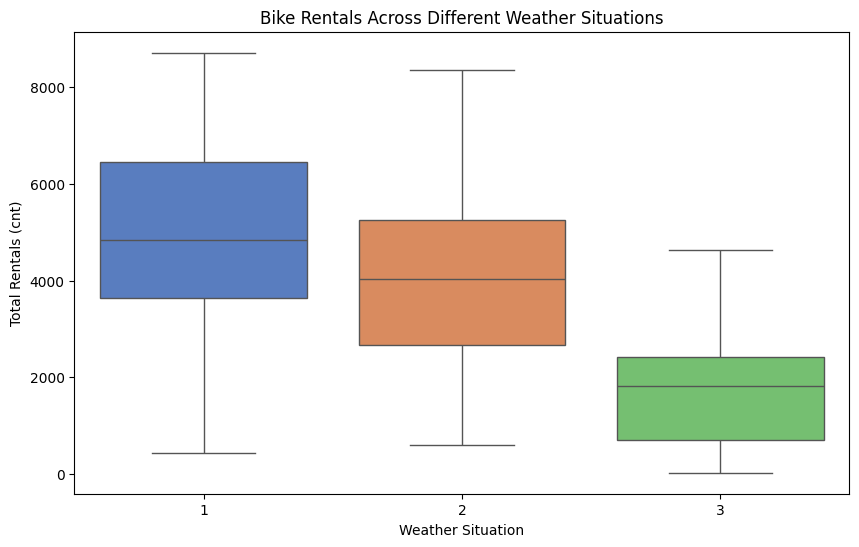

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=dataset_day, palette='muted')
plt.title('Bike Rentals Across Different Weather Situations')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals (cnt)')
plt.show()

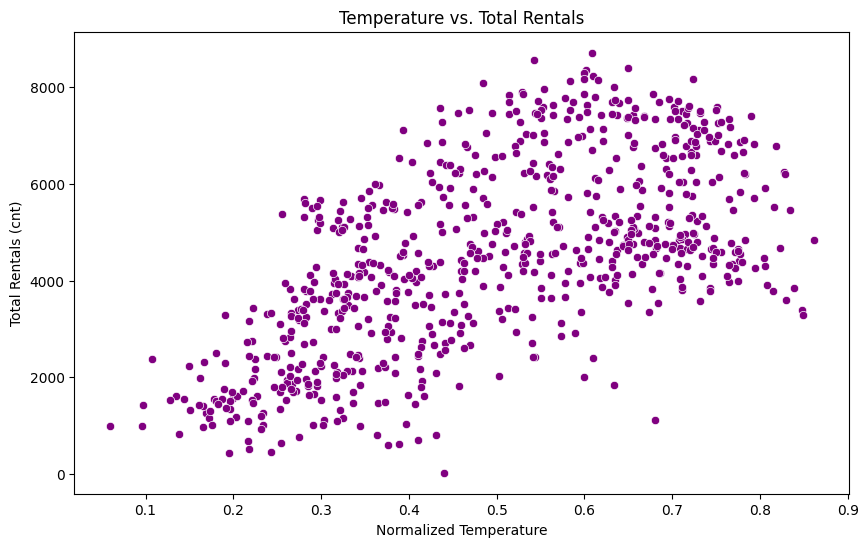

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=dataset_day, color='purple')
plt.title('Temperature vs. Total Rentals')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals (cnt)')
plt.show()

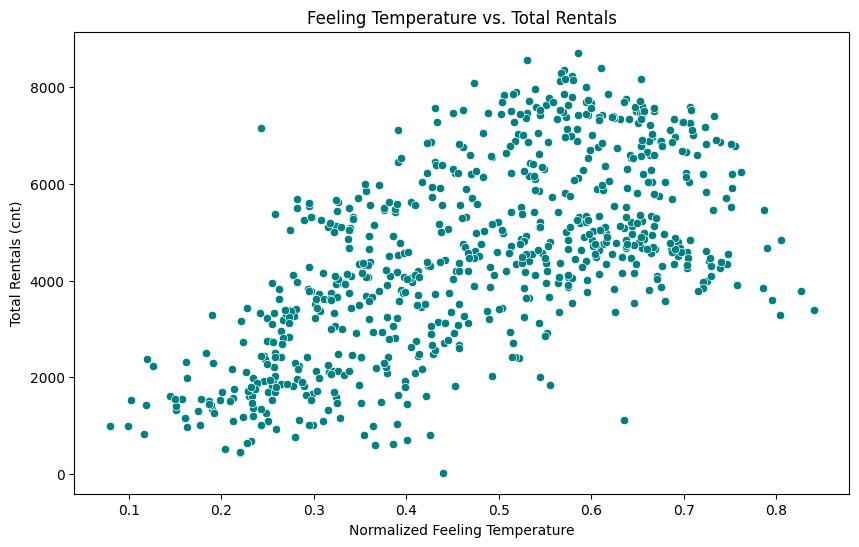

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='atemp', y='cnt', data=dataset_day, color='teal')
plt.title('Feeling Temperature vs. Total Rentals')
plt.xlabel('Normalized Feeling Temperature')
plt.ylabel('Total Rentals (cnt)')
plt.show()

C:\Users\nabhp\AppData\Local\Temp\ipykernel_33440\3627151626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Casual', 'Registered'], y=[dataset_day['casual'].sum(), dataset_day['registered'].sum()], palette='pastel')


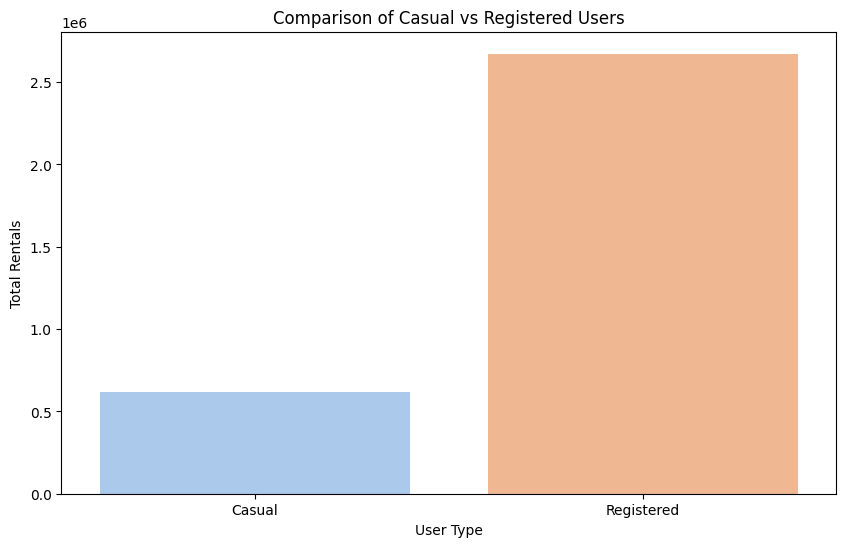

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['Casual', 'Registered'], y=[dataset_day['casual'].sum(), dataset_day['registered'].sum()], palette='pastel')
plt.title('Comparison of Casual vs Registered Users')
plt.xlabel('User Type')
plt.ylabel('Total Rentals')
plt.show()

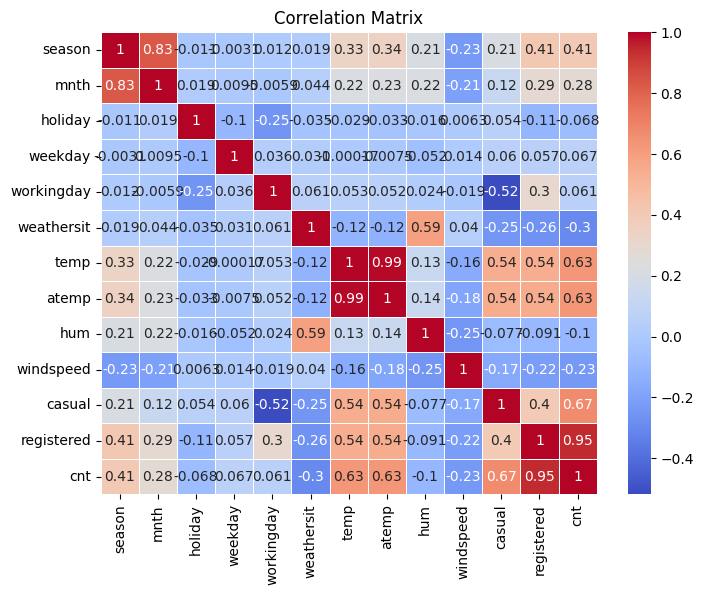

In [18]:
corr_matrix = dataset_day[['season','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
target = 'cnt'

In [21]:
X = dataset_day[features]
y = dataset_day[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

In [25]:
print(f"Model Stats\nMean Absolute Error: {mae}\nMean Squared Error: {mse}\nRoot Mean Squared Error: {rmse}\nR2 Score: {r2}")

Model Stats
Mean Absolute Error: 617.3930656443376
Mean Squared Error: 691035.0082022649
Root Mean Squared Error: 831.2851545662685
R2 Score: 0.8276670090367213


In [26]:
import joblib
joblib.dump(model, "Model.pkl")

['Model.pkl']